# Look at $\phi_\pi$ in default vs. rgb spring2019 GEMC (gcard) configurations

last edit May-12, 2021

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# load data 

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AcceptanceCorrection/GEMCimulationOuputFiles/'

In [14]:
labels = ['default'  ,'rgb_spring2019','rgb_spring2019_Florian'];
colors = ['royalblue','salmon','k']

In [16]:
pips = dict()
for label in labels:
    pips[label] = pd.read_csv(main_data_path + 'gcard_' + label + '/'+ 
                                  'eepips_p_uniform_distribution.csv');
print('done')

done


## plot $\phi_\pi$

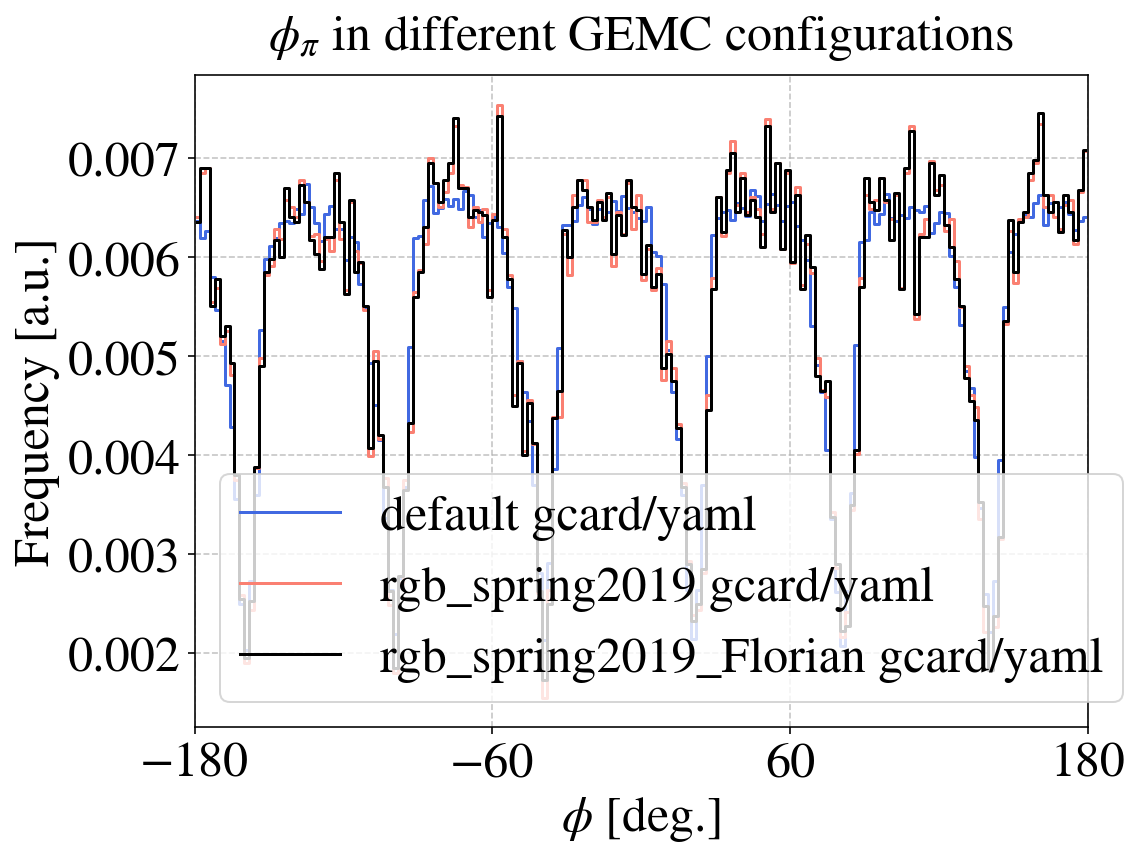

In [17]:
fig = plt.figure(figsize=(8,6));
ax = fig.add_subplot(1,1,1)

for i,label,color in zip(range(3),labels,colors):
    df=pips[label]
    df = df[(df.e_reconstructed==1) & (df.pi_reconstructed==1)]

    plot_step_hist( x_arr=df.pi_Phi*r2d,  bins=phi_bins , label=label + ' gcard/yaml', 
                   color=color, do_plot_errorbar=False, density=True, linewidth=3)

    # cosmetics
    set_axes(ax, '$\phi$ [deg.]', 'Frequency [a.u.]',
                 title='$\phi_\pi$ in different GEMC configurations',
                 do_add_grid=True,
                 do_add_legend=True,
                 xlim=phi_xlim,
                 xticks=phi_xticks)   